Contenido bajo licencia Creative Commons BY 4.0 y código bajo licencia MIT. © Juan Gómez y Nicolas Guarín-Zapata 2019. Este material es parte del curso Mecánica de los Medios Continuos en el programa de Ingeniería Civil de la Universidad EAFIT.

# Soluciones analíticas para presas triangulares

Este Notebook permite visualizar la solución analítica de una presa triangular
para un ángulo interno de 45° sometida al empuje de un fluido de peso específico
$\gamma$ en condiciones hidrostáticas. Adicionalmente, también permite visualizar
la solución para una presa triangular con ángulo interno $\alpha$ sometida al
empuje de un fluido de densidad $\rho$ en condiciones hidrostáticas, y peso
propio para concreto de densidad $\rho_c$.

Estas soluciones pueden usarse como apoyo en la actividad de diseño de la presa
trapezoidal.

## Importación de paquetes

In [8]:
import numpy as np
from numpy import pi, sin, cos, sqrt
import matplotlib.pyplot as plt
from meshzoo import triangle
from ipywidgets import interact

In [9]:
%matplotlib notebook
gris = '#757575'
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["text.color"] = gris
plt.rcParams["font.size"] = 12
plt.rcParams["xtick.color"] = gris
plt.rcParams["ytick.color"] = gris
plt.rcParams["axes.labelcolor"] = gris
plt.rcParams["axes.edgecolor"] = gris
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["image.cmap"] = "RdYlBu_r"

## Presa sin peso propio

El siguiente esquema muestra el problema que se está estudiando.

<center>
    <img src="img/presa.svg"
         alt="Presa sin peso propio."
         style="width:450px">
</center>


Para este problema, la solución de tensiones está dada por:

\begin{align}
\sigma_{xx} &= \gamma(y-H)\\
\sigma_{yy} &= -2\gamma x-\gamma(y-H)\\
\tau_{yy} &= -\gamma x
\end{align}


La siguiente función (`plot_dam`) permite graficar los contornos para la presa.
Tiene como parámetro opcional `plot_type` que permite graficar los contornos
para los esfuerzos principales y cortantes máximos — cuando es igual a `"principal"` —
y graficar los esfuerzos en el sistema coordenado dado — cuando es igual a
`"original"`.

In [10]:
def plot_dam(plot_type="principal"):
    npts = 30
    pts, tri = triangle(npts, corners=[[0, 0], [1, 0], [0, 1]])
    x, y = pts.T
    γ = 1
    σ_xx = γ*(y - 1)
    σ_yy = -2*γ*x - γ*(y - 1)
    τ_xy = -γ*x
    τ_max = sqrt((σ_xx - σ_yy)**2/4 + τ_xy**2)
    σ_m = 0.5*(σ_xx + σ_yy)
    σ1 = σ_m + τ_max
    σ2 = σ_m - τ_max
    
    if plot_type == "principal":
        fields = [σ1, σ2, τ_max]
        titles = [r"$\sigma_{1}/\gamma$", r"$\sigma_{2}/\gamma$", r"$\tau_\max/\gamma$"]
    else:
        fields = [σ_xx, σ_yy, τ_xy]
        titles = [r"$\sigma_{xx}/\gamma$", r"$\sigma_{yy}/\gamma$", r"$\tau_{xy}$/\gamma"]

    plt.clf()
    fig = plt.gcf()
    axes = fig.subplots(1, 3)
    for cont, ax in enumerate(axes):
        f_max = max(np.max(fields[cont]), -np.min(fields[cont]))
        im = ax.tricontourf(x, y, tri, fields[cont], levels=12, vmin=-f_max, vmax=f_max)
        fig.colorbar(im, ax=ax, shrink=0.75)
        ax.axis("image")
        ax.axis("off")
        ax.set_title(titles[cont])
    plt.tight_layout()
    return None

Por facilidad de uso, hemos creado un _widget_ que permite variar el parámetro
de entrada con un menú desplegable.

<div class="alert alert-warning">
    
Pruebe a cambiar el parámetro de entrada para ver cómo difieren los campos para las componentes
del tensor en el sistema coordenado dado y en sus direcciones principales.

</div>


<IPython.core.display.Javascript object>


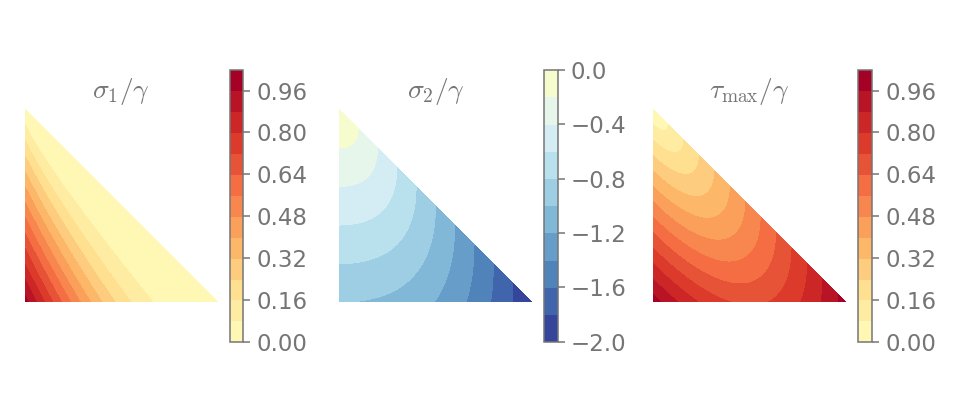

interactive(children=(Dropdown(description='plot_type', index=1, options=('original', 'principal'), value='pri…

In [12]:
plt.figure(figsize=(7, 3))
widget0 = interact(plot_dam,
                  plot_type=["original",
                             "principal"])

## Presa con peso propio

El siguiente esquema muestra el problema que se está estudiando.

<center>
    <img src="img/presa_peso.svg"
         alt="Presa con peso propio."
         style="width:400px">
</center>

Este es un problema más general que el anterior, ya que la solución es válida
para diferentes ángulos (no solo 45°), y además permite considerar el peso de
la presa. Cuando $\rho_c = 0$ y $\alpha = \pi/4 \approx 0.79$ se tiene el caso
anterior.


En este caso, la solución analítica de tensiones está dada por:

\begin{align}
\frac{\sigma_{rr}}{\rho g} =& - \left(- \frac{\rho_{c} \cot(\alpha)}{4} + \frac{\cot^{3}(\alpha)}{2}\right) \sin(3\theta)
  + \left(\frac{\rho_{c} \cot(\alpha)}{4} - \frac{\cot^{3}(\alpha)}{2}\right) \sin(\theta)\\
  &+ \left(- \frac{\rho_{c}}{4} + \frac{3 \cot^{2}(\alpha)}{4} + \frac{1}{4}\right) \cos(3\theta)
  + \left(\frac{\rho_{c}}{4} + \frac{\cot^{2}(\alpha)}{4} - \frac{1}{4}\right) \cos(\theta)
  - \rho_{c} \cos(\theta)\\
\frac{\sigma_{\theta\theta}}{\rho g} =& \left(- \frac{\rho_{c} \cot(\alpha)}{4}
  + \frac{\cot^{3}(\alpha)}{2}\right) \sin(3\theta) + \left(\frac{3 \rho_{c} \cot(\alpha)}{4}
  - \frac{3 \cot^{3}(\alpha)}{2}\right) \sin(\theta)\\
  &+ \left(\frac{\rho_{c}}{4} - \frac{3 \cot^{2}(\alpha)}{4} - \frac{1}{4}\right) \cos(3\theta)
  + \left(\frac{3 \rho_{c}}{4} + \frac{3 \cot^{2}(\alpha)}{4} - \frac{3}{4}\right) \cos(\theta)
  - \rho_{c} \cos(\theta)\\
\frac{\sigma_{r\theta}}{\rho g} =& - \left(- \frac{\rho_{c} \cot(\alpha)}{4}
  + \frac{\cot^{3}(\alpha)}{2}\right) \cos(3\theta) - \left(\frac{\rho_{c} \cot(\alpha)}{4}
  - \frac{\cot^{3}(\alpha)}{2}\right) \cos(\theta)\\
  &+ \left(\frac{\rho_{c}}{4}  - \frac{3 \cot^{2}(\alpha)}{4} - \frac{1}{4}\right) \sin(3\theta)
  + \left(\frac{\rho_{c}}{4} + \frac{\cot^{2}(\alpha)}{4} - \frac{1}{4}\right) \sin(\theta)
\end{align}


La siguiente función (`plot_dam_weight`) permite graficar los contornos para la presa
con peso propio. Tiene como parámetros opcionales: `α`, `ρ_c` y `plot_type` que permiten
cambiar el ángulo, densidad de la presa y el tipo de gráfica — al igual que en el 
caso anterior —.

In [13]:
def plot_dam_weight(α=pi/4, ρ_c=1, plot_type="principal"):
    npts = 30
    pts, tri = triangle(npts, corners=[[0, 0], [cos(α), 0], [cos(α), sin(α)]])
    x, y = pts.T
    r = sqrt(x**2 + y**2)
    θ = np.arctan2(y, x)
    r = 1
    ρ = 1
    g = 1
    cot = lambda x: cos(x)/sin(x)
    A =  (ρ_c - ρ)*g/24 - ρ*g *cot(α)**2/8
    B = ρ*cot(α)**3/12 - ρ_c*g*cot(α)/24
    C = (ρ_c - ρ)*g/8 + ρ*g*cot(α)**2/8
    D = ρ_c*g*cot(α)/8 - ρ*g*cot(α)**3/4

    σ_rr = -6*A*r*cos(3*θ) - 6*B*r*sin(3*θ) + 2*C*r*cos(θ) \
        + 2*D*r*sin(θ) - ρ_c*g*r*cos(θ)
    τ_rθ = 6*A*r*sin(3*θ) - 6*B*r*cos(3*θ) + 2*C*r*sin(θ) \
        - 2*D*r*cos(θ)
    σ_θθ = 6*A*r*cos(3*θ) + 6*B*r*sin(3*θ) + 6*C*r*cos(θ) \
        + 6*D*r*sin(θ) - ρ_c*g*r*cos(θ)

    τ_max = sqrt((σ_rr - σ_θθ)**2/4 + τ_rθ**2)
    σ_m = 0.5*(σ_rr + σ_θθ)
    σ1 = σ_m + τ_max
    σ2 = σ_m - τ_max
    
    if plot_type == "principal":
        fields = [σ1, σ2, τ_max]
        titles = [r"$\sigma_{1}/\rho g$", r"$\sigma_{2}/\rho g$", r"$\tau_\max/\rho g$"]
    else:
        fields = [σ_rr, σ_θθ, τ_rθ]
        titles = [r"$\sigma_{rr}/\rho g$", r"$\sigma_{\theta\theta}/\rho g$", r"$\tau_{r\theta}/\rho g$"]

    plt.clf()
    fig = plt.gcf()
    axes = fig.subplots(1, 3)
    for cont, ax in enumerate(axes):
        f_max = max(np.max(fields[cont]), -np.min(fields[cont]))
        im = ax.tricontourf(y, x, tri, fields[cont], levels=12, vmin=-f_max, vmax=f_max)
        fig.colorbar(im, ax=ax, shrink=0.75)
        ax.invert_yaxis()
        ax.axis("image")
        ax.axis("off")
        ax.set_title(titles[cont])
    plt.tight_layout()
    return None

Por facilidad de uso, hemos creado un _widget_ que permite variar los parámetros.
El ángulo ($\alpha$) y densidad ($\rho_c$), pueden variarse usando deslizadores
y el tipo de gráfico con un menú desplegable.

<div class="alert alert-warning">
    
Pruebe a cambiar los parámetros de entrada para ver cómo difieren los campos.

</div>

## Referencias

* Juan Gómez, César Augusto Sierra, Juan Carlos Vergara, Mario Sáenz, y Nicolás Guarín-Zapata (2018). Notas de clase: Mecánica del medio continuo. Universidad EAFIT, Disponible en: https://github.com/AppliedMechanics-EAFIT/Notas-MMC.

* J.R. Barber (2010). Elasticity. Springer Netherlands.

## Formato del Notebook

La siguiente celda da formato al Notebook.

In [14]:
from IPython.core.display import HTML
def css_styling():
    styles = open('./nb_style.css', 'r').read()
    return HTML(styles)
css_styling()

<IPython.core.display.Javascript object>


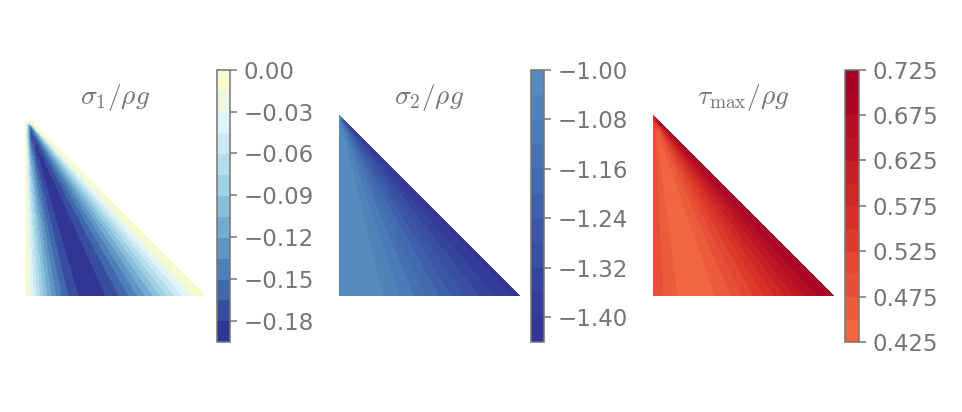

interactive(children=(FloatSlider(value=0.7853981633974483, description='α', max=1.0, min=0.08), FloatSlider(v…

In [16]:
plt.figure(figsize=(7, 3))
widget = interact(plot_dam_weight,
                  α=(0.08,1),
                  ρ_c=(0.0,10.),
                  plot_type=["original",
                             "principal"])